In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import io

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
df = pd.read_csv('paths_and_labels.csv')

In [3]:
df.head()

,img_path,class
0,mdb003.pgm.png,dense
1,mdb004.pgm.png,dense
2,mdb033.pgm.png,dense
3,mdb034.pgm.png,dense
4,mdb035.pgm.png,dense


In [4]:
df.img_path[0]

'mdb003.pgm.png'

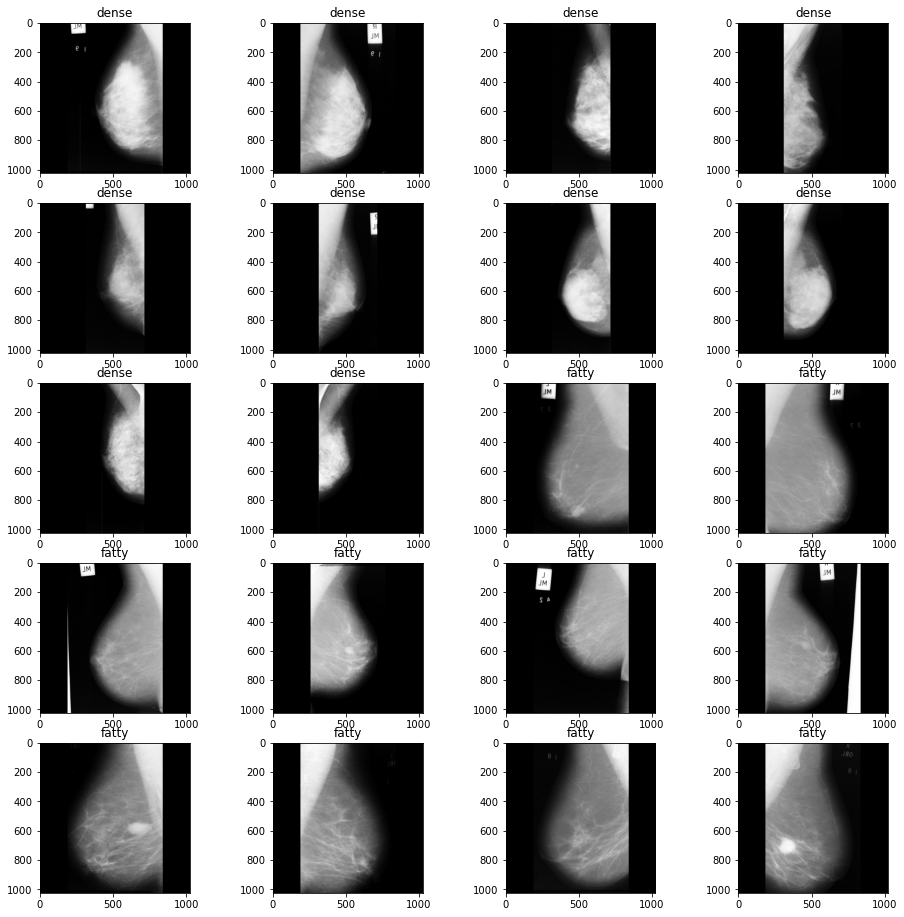

In [5]:
fig, m_axs = plt.subplots(5, 4, figsize = (16, 16))
m_axs = m_axs.flatten()
imgs = df.img_path
ind = 0

for img,ax in zip(imgs, m_axs):
    img = io.imread(img)
    ax.imshow(img, cmap='gray')
    ax.set_title(df.iloc[ind]['class'])
    ind = ind + 1

In [6]:
IMG_SIZE = (224, 224)

In [7]:
idg = ImageDataGenerator(rescale=1. / 255.0,
                        horizontal_flip=True,
                        vertical_flip=False,
                        height_shift_range=0.1,
                        width_shift_range=0.1,
                        rotation_range=20,
                        shear_range=0.1,
                        zoom_range=0.1)

gen = idg.flow_from_dataframe(dataframe=df,
                             directory=None,
                             x_col='img_path',
                             y_col='class',
                             class_mode='binary',
                             target_size=IMG_SIZE,
                             batch_size=9)

Found 20 validated image filenames belonging to 2 classes.


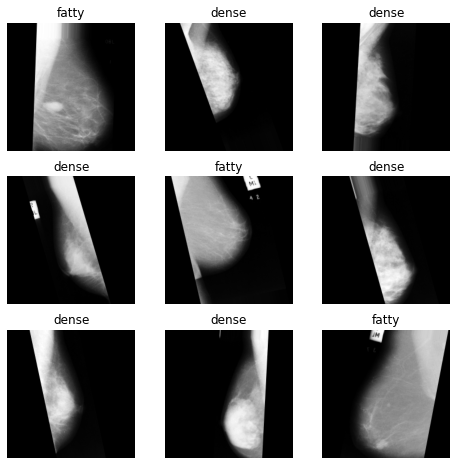

In [8]:
t_x, t_y = next(gen)
fig, m_axs = plt.subplots(3, 3, figsize=(8,8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap='gray')
    if c_y == 1:
        c_ax.set_title('fatty')
    else:
        c_ax.set_title('dense')
    c_ax.axis('off')